In [1]:
%matplotlib inline

# Load Data from Copernicus Marine Services (CMEMS)

In [2]:
# https://help.marine.copernicus.eu/en/articles/8287609-copernicus-marine-toolbox-api-open-a-dataset-or-read-a-dataframe-remotely

In [3]:
import matplotlib.pyplot as plt
import copernicusmarine
import xarray as xr
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

/Users/daniels/.local/share/mamba/envs/climarest/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# # https://help.marine.copernicus.eu/en/articles/8185007-copernicus-marine-toolbox-credentials-configuration
# copernicusmarine.login()

## Load into XArray

In [5]:
# Import modules
# import copernicusmarine

# We want to use this dataset:
# https://data.marine.copernicus.eu/product/IBI_ANALYSISFORECAST_PHY_005_001/description
# https://data.marine.copernicus.eu/product/IBI_ANALYSISFORECAST_PHY_005_001/services

tlo = datetime.datetime.now().isoformat()
thi = (datetime.datetime.now() + datetime.timedelta(days=7)).isoformat()

# Set parameters
data_request = {
    # "dataset_id" : "cmems_mod_ibi_phy_anfc_0.027deg-3D_PT1H-m",  # 3D, hourly
    "dataset_id" : "cmems_mod_ibi_wav_anfc_0.027deg_PT1H-i",  # 2D, hourly
    # "dataset_id" : "cmems_mod_ibi_phy_anfc_0.027deg-2D_PT1H-m",  # 2D, hourly
    # "dataset_id" : "cmems_mod_ibi_phy_anfc_0.027deg-2D_PT15M-i",  # 2D, 15min
    # "dataset_id" : "cmems_mod_ibi_phy-wcur_anfc_0.027deg_P1D-m",  # vertical currents, daily
    "longitude" : [-6.17, -5.09], 
    "latitude" : [35.75, 36.29],
    "time" : [tlo, thi],
    # "time" : ["2025-05-10", "2025-05-12"],
    # "variables" : ["sea_surface_temperature"]
}

# Load xarray dataset
dset = copernicusmarine.open_dataset(
    dataset_id = data_request["dataset_id"],
    # minimum_longitude = data_request["longitude"][0],
    # maximum_longitude = data_request["longitude"][1],
    # minimum_latitude = data_request["latitude"][0],
    # maximum_latitude = data_request["latitude"][1],
    start_datetime = data_request["time"][0],
    end_datetime = data_request["time"][1],
    # variables = data_request["variables"]
)

# Print loaded dataset information
# print(dset)

INFO - 2025-06-04T06:49:38Z - Selected dataset version: "202411"
INFO - 2025-06-04T06:49:38Z - Selected dataset part: "default"


In [8]:
dset

<xarray.Dataset> Size: 24GB
Dimensions:    (time: 168, latitude: 1081, longitude: 865)
Coordinates:
  * latitude   (latitude) float32 4kB 26.0 26.03 26.06 ... 55.95 55.97 56.0
  * longitude  (longitude) float32 3kB -19.0 -18.97 -18.94 ... 4.945 4.973 5.001
  * time       (time) datetime64[ns] 1kB 2025-06-04T09:00:00 ... 2025-06-11T0...
Data variables: (12/19)
    VCMX       (time, latitude, longitude) float64 1GB dask.array<chunksize=(1, 1081, 865), meta=np.ndarray>
    VHM0       (time, latitude, longitude) float64 1GB dask.array<chunksize=(1, 1081, 865), meta=np.ndarray>
    VHM0_SW1   (time, latitude, longitude) float64 1GB dask.array<chunksize=(1, 1081, 865), meta=np.ndarray>
    VHM0_SW2   (time, latitude, longitude) float64 1GB dask.array<chunksize=(1, 1081, 865), meta=np.ndarray>
    VHM0_WW    (time, latitude, longitude) float64 1GB dask.array<chunksize=(1, 1081, 865), meta=np.ndarray>
    VMDR       (time, latitude, longitude) float64 1GB dask.array<chunksize=(1, 1081, 865), meta=np.ndarray>
    ...         ...
    VTM01_SW1  (time, latitude, longitude) float64 1GB dask.array<chunksize=(1, 1081, 865), meta=np.ndarray>
    VTM01_SW2  (time, latitude, longitude) float64 1GB dask.array<chunksize=(1, 1081, 865), meta=np.ndarray>
    VTM01_WW   (time, latitude, longitude) float64 1GB dask.array<chunksize=(1, 1081, 865), meta=np.ndarray>
    VTM02      (time, latitude, longitude) float64 1GB dask.array<chunksize=(1, 1081, 865), meta=np.ndarray>
    VTM10      (time, latitude, longitude) float64 1GB dask.array<chunksize=(1, 1081, 865), meta=np.ndarray>
    VTPK       (time, latitude, longitude) float64 1GB dask.array<chunksize=(1, 1081, 865), meta=np.ndarray>
Attributes:
    references:   http://marine.copernicus.eu/
    title:        Wave hourly instantaneous fields for the Iberia-Biscay-Irel...
    source:       MFWAM-CY47R1
    Conventions:  CF-1.8
    contact:      https://marine.copernicus.eu/contact
    comment:      
    institution:  NOWSystems-MeteoFrance

## Plot

In [9]:
data = dset["VHM0"]  # Replace with your actual variable name

In [11]:
data.sel(time=data.time[0])

<xarray.DataArray 'VHM0' (latitude: 1081, longitude: 865)> Size: 7MB
dask.array<getitem, shape=(1081, 865), dtype=float64, chunksize=(1081, 865), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 4kB 26.0 26.03 26.06 ... 55.95 55.97 56.0
  * longitude  (longitude) float32 3kB -19.0 -18.97 -18.94 ... 4.945 4.973 5.001
    time       datetime64[ns] 8B 2025-06-04T09:00:00
Attributes: (12/14)
    WMO_code:          100
    easting:           longitude
    latitude_max:      56.f
    latitude_min:      26.f
    long_name:         Spectral significant wave height (Hm0)
    longitude_max:     5.f
    ...                ...
    standard_name:     sea_surface_wave_significant_height
    type_of_analysis:  spectral analysis
    unit_long:         Meters
    units:             m
    valid_max:         3000
    valid_min:         0

Text(0.5, 1.0, 'Temperature at time 2025-06-04T09:00:00.000000000')

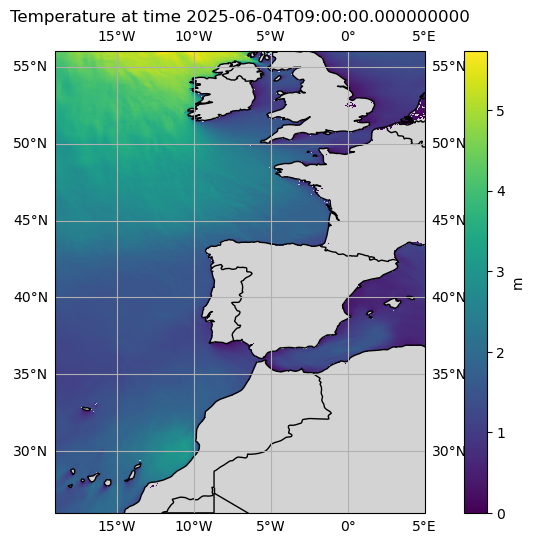

In [20]:
# Choose the projection
proj = ccrs.PlateCarree()

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.gridlines(draw_labels=True)

# Plot the data (selecting a time slice if necessary)
data.sel(time=data.time[0]).plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    cbar_kwargs={'label': f"{data.units}"}
)

ax.set_title(f"Temperature at time {data.time[0].values}")
# plt.show()

## Plot with Sites

In [13]:
gdf_aoi = gpd.read_file('../data/quiberon_bay.geojson')
gdf_aoi['centroid'] = gdf_aoi.geometry.to_crs(epsg=25830).centroid.to_crs(epsg=4326)
gdf_aoi

,name,geometry,centroid
0,Quiberon Bay,"POLYGON ((-3.2 47.3, -3 47.3, -3 47.5, -3.2 47...",POINT (-3.1 47.39998)


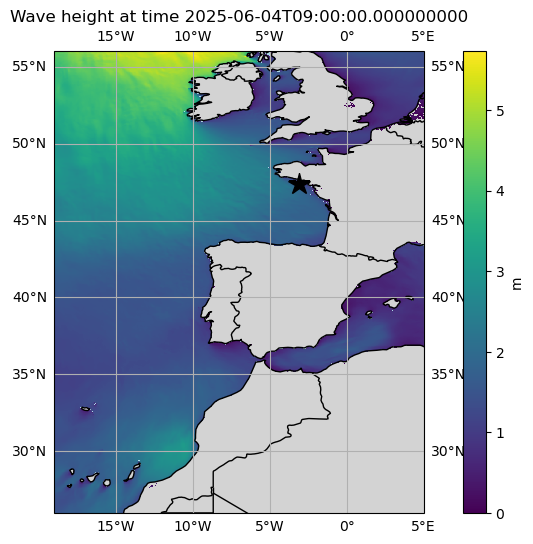

In [16]:
# Choose the projection
proj = ccrs.PlateCarree()

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.gridlines(draw_labels=True)

# Plot the data (selecting a time slice if necessary)
data.sel(time=data.time[0]).plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    cbar_kwargs={'label': f"{data.units}"}
)

# Add site locations
for _, row in gdf_aoi.iterrows():
    #print(row.centroid)
    ax.plot(row.centroid.x, row.centroid.y, marker='*', color='black',
            markersize=4**2, transform=ccrs.PlateCarree())
    # ax.text(loc["lon"] + 0.5, loc["lat"] + 0.5, loc["name"],
    #         transform=ccrs.PlateCarree(), fontsize=9, color='black')

ax.set_title(f"Wave height at time {data.time[0].values}")
pass
# plt.show()

# Plot with Sites, Zoomed

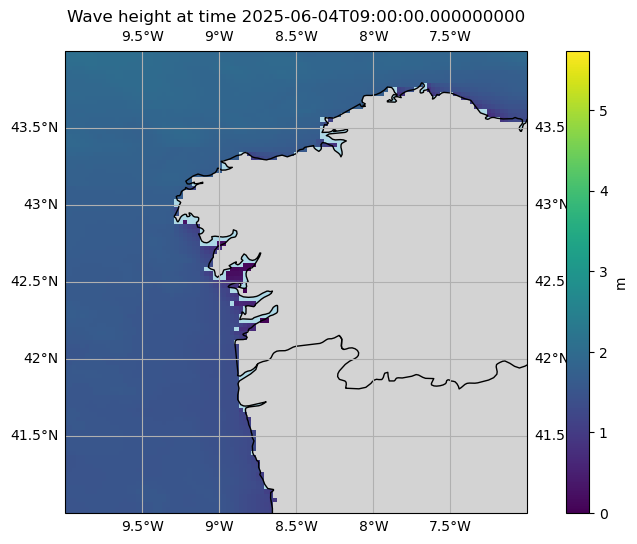

In [19]:
# Choose the projection
proj = ccrs.PlateCarree()

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.gridlines(draw_labels=True)

# Plot the data (selecting a time slice if necessary)
data.sel(time=data.time[0]).plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    cbar_kwargs={'label': f"{data.units}"}
)

# Add site locations
for _, row in gdf_aoi.iterrows():
    #print(row.centroid)
    ax.plot(row.centroid.x, row.centroid.y, marker='*', color='black',
            markersize=4**2, transform=ccrs.PlateCarree())
    # ax.text(loc["lon"] + 0.5, loc["lat"] + 0.5, loc["name"],
    #         transform=ccrs.PlateCarree(), fontsize=9, color='black')

ax.set_xlim([-10,-7])
ax.set_ylim([41,44])

ax.set_title(f"Wave height at time {data.time[0].values}")
pass
# plt.show()